# Data Visualisation

- Data visualtion is a simple act of showcasing the data in a visual context
- Data analysis is the story one would want to tell the audience but visuals are the backbone and appeal one would desire to present

### Importance of Data Visualization:-
- Data visualizations simplifies things for human brain to understand small or large datasets
- It makes it easier to detect patterns, trends, and outliers in clusters of data
- From below picture you can see how a data visual gives new perspective than a data table

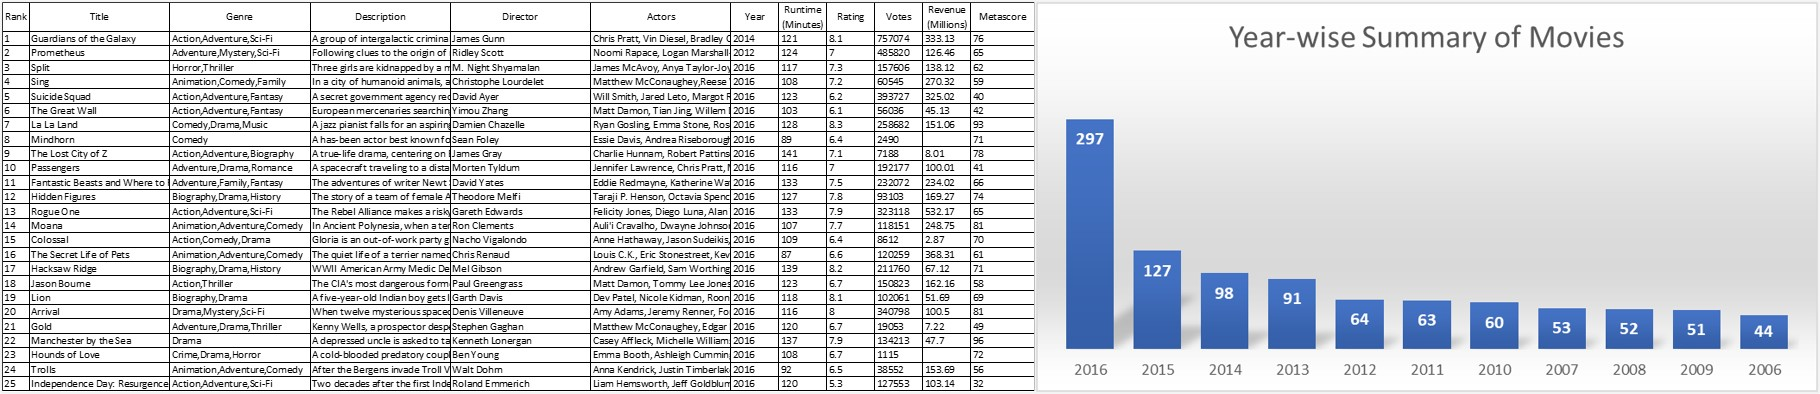


### How to tell a story?
- Understand the context
- Choose an appropriate visual display
- Eliminate clutter
- Focus attention where you want it
- Think like a designer
- Tell a story ([Data Story Telling]([https://www.amazon.com/Storytelling-Data-Visualization-Business-Professionals/dp/1119002257))

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd

#hide warnings
import warnings
warnings.filterwarnings('ignore')

#display max columns of pandas dataframe
pd.set_option('display.max_columns', None)

## Data Visulization Libraries

### Install and import

- Pandas is an easy package to install
- Install it using either of the following commands:
   - conda install pandas
   - use command `!pip install matplotlib` in jupyter notebook

### Matplotlib
- Matplotlib is a 2-D plotting library that helps in visualizing figures
- It is a robust, free and easy library for data visualization
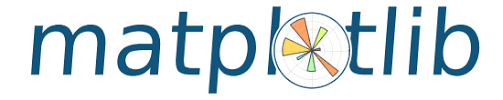

### Anatomy of Matplotlib Figure
<img align="left" width="600" height="600" src="https://matplotlib.org/3.1.1/_images/anatomy.png">

In [2]:
#Loading data visualtion library
import matplotlib.pyplot as plt

# simple empty plot creation
fig = plt.figure()  # an empty figure with no axes
plt.title('This is the title')  # Add a title so we know which it is
fig, ax_lst = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 4 Axes>

- A figure contains the canvas where data is plotted
- Axes is a single plot
- Each axes has an x-axis and y-axis
- Within the axes are titles, ticks, labels etc.
- Multiple plots can be created

<img align="left" width="300" height="300" src="https://miro.medium.com/max/848/1*Fk80UWElsZI6f_poAv_7cQ.png">

#### Commands to plot graph:-
- `plt.plot()` - for plotting data. Pass the data as an argument within the bracket
- `plot.xlabel` | `plt.ylabel` for x and y axis labeling
- `plt.xticks`  | `plt.yticks` - for labeling x and y-axis tick points
- `plt.legend()` -  for adding the variable name/category
- `plt.title()` for adding plot title
- `plot.show()` - for displaying the plot

In [3]:
# to change current directory
import os
os.chdir("C:/Users/arock.000/Downloads")

In [4]:
df = pd.read_csv('netflix_titles.csv')
df.head(3)# data was cleaned up manually prior to loading. correct date_added column to date format

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",9-Sep-19,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,9-Sep-16,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,8-Sep-18,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."


In [5]:
# Helper Function - Missing data check
def missing_data(data):
    missing = data.isnull().sum()
    available = data.count()
    total = (missing + available)
    percent = (data.isnull().sum()/data.isnull().count()*100).round(4)
    return pd.concat([missing, available, total, percent], axis=1, keys=['Missing', 'Available', 'Total', 'Percent']).sort_values(['Missing'], ascending=False)

In [6]:
missing_data(df)

,Missing,Available,Total,Percent
director,1969,4265,6234,31.5849
cast,570,5664,6234,9.1434
country,476,5758,6234,7.6355
rating,10,6224,6234,0.1604
show_id,0,6234,6234,0.0000
type,0,6234,6234,0.0000
title,0,6234,6234,0.0000
date_added,0,6234,6234,0.0000
release_year,0,6234,6234,0.0000
duration,0,6234,6234,0.0000


In [7]:
# replacing na values in college with No college 
df["rating"].fillna("TBD", inplace = True)

In [8]:
# create a pivot table of date vs show counts
year = df.pivot_table(index = pd.DatetimeIndex(df['date_added']).year, values='show_id', aggfunc='count')

# Line Plot

Text(0, 0.5, 'No of Shows')

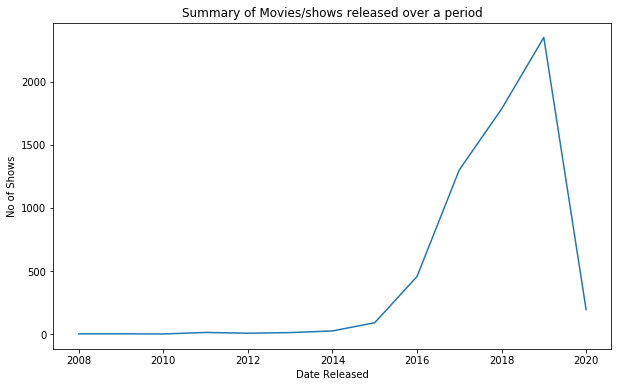

In [9]:
plt.figure(figsize=(10,6))
plt.plot(year, linestyle='solid')
plt.title("Summary of Movies/shows released over a period")
plt.xlabel('Date Released') 
plt.ylabel('No of Shows')

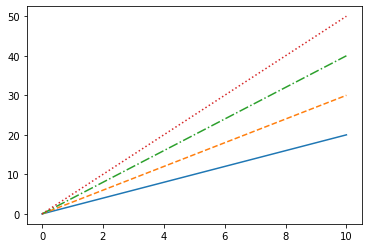

In [10]:
# Adjusting line style
x = np.linspace(0, 10, 1000)
plt.plot(x, x * 2, linestyle='solid')
plt.plot(x, x * 3, linestyle='dashed')
plt.plot(x, x * 4, linestyle='dashdot')
plt.plot(x, x * 5, linestyle='dotted')

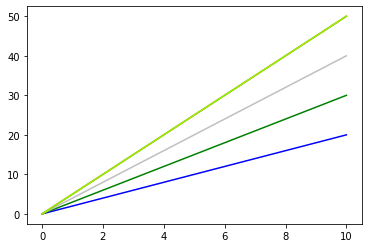

In [11]:
# Adjusting line color
plt.plot(x, x * 2, color='blue')        # specify color by name
plt.plot(x, x * 3, color='g')           # short color code (rgbcmyk)
plt.plot(x, x * 4, color='0.75')        # Grayscale between 0 and 1
plt.plot(x, x * 5, color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, x * 5, color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, x * 5, color='chartreuse') # all HTML color names supported

#### `plt` to `ax` function
- `plt.xlabel()` → `ax.set_xlabel()`
- `plt.ylabel()` → `ax.set_ylabel()`
- `plt.xlim()` → `ax.set_xlim()`
- `plt.ylim()` → `ax.set_ylim()`
- `plt.title()` → `ax.set_title()`

# Bar Graph

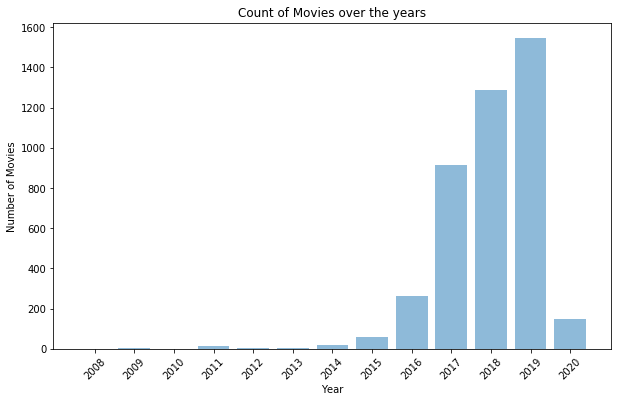

In [12]:
#creating a new dataframe by pivotiing the available data
new =df.pivot_table(index = pd.DatetimeIndex(df['date_added']).year, columns = 'type', values='show_id', aggfunc='count', fill_value = 0)
flattened = pd.DataFrame(new.to_records())

# Vertical bar plot
plt.figure(figsize=(10,6))
plt.bar(flattened['date_added'], flattened['Movie'], align='center', alpha=0.5)
plt.xticks(flattened['date_added'],rotation = 45)
plt.ylabel('Number of Movies')
plt.xlabel('Year')
plt.title('Count of Movies over the years')

plt.show()

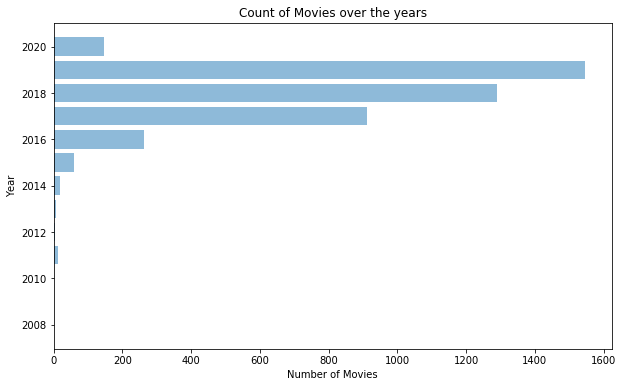

In [13]:
# horizontal bar plot
plt.figure(figsize=(10,6))
plt.barh(flattened['date_added'], flattened['Movie'], align='center', alpha=0.5)
plt.xlabel('Number of Movies')
plt.ylabel('Year')
plt.title('Count of Movies over the years')

plt.show()

In [14]:
flattened.head(3)

,date_added,Movie,TV Show
0,2008,1,1
1,2009,2,0
2,2010,1,0


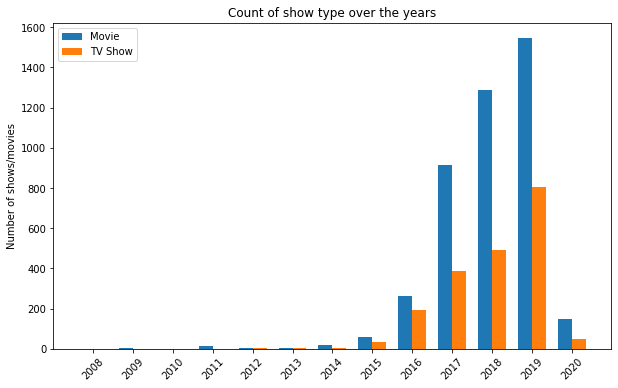

In [15]:
# bar plot with categories
ind = np.arange(len(flattened['date_added'])) 
width = 0.35
plt.figure(figsize=(10,6))
plt.bar(ind, flattened['Movie'], width, label='Movie')
plt.bar(ind + width, flattened['TV Show'], width,
    label='TV Show')

plt.ylabel('Number of shows/movies')
plt.title('Count of show type over the years')

plt.xticks(ind + width / 2, flattened['date_added'], rotation = 45)
plt.legend(loc='best')
plt.show()

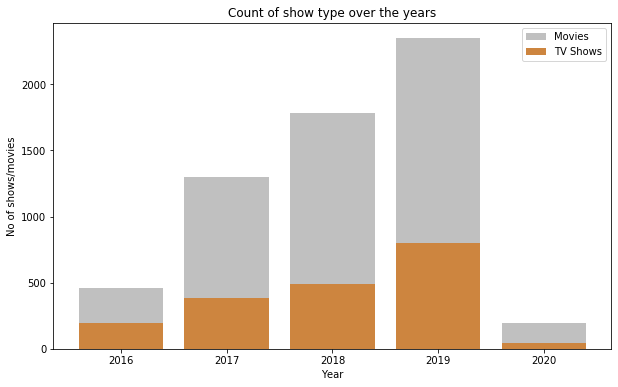

In [16]:
#stacked bar

new_df = flattened[flattened['date_added']>2015]
ind = [x for x, _ in enumerate(new_df['date_added'])]
plt.figure(figsize=(10,6))
plt.bar(ind, new_df['Movie'], width=0.8, label='Movies', color='silver', bottom = np.array(new_df['TV Show']))
plt.bar(ind, new_df['TV Show'], width=0.8, label='TV Shows', color='#CD853F')

plt.xticks(ind, new_df['date_added'])
plt.ylabel("No of shows/movies")
plt.xlabel("Year")
plt.legend(loc="upper right")
plt.title("Count of show type over the years")

plt.show()

# Pie Chart

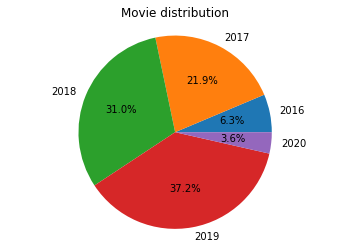

In [17]:
my_labels = '2016','2017','2018','2019', '2020'
plt.pie(new_df['Movie'],labels=my_labels,autopct='%1.1f%%')
plt.title('Movie distribution')
plt.axis('equal')
plt.show()

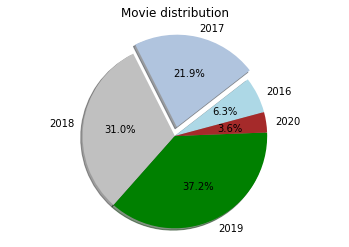

In [18]:
my_colors = ['lightblue','lightsteelblue','silver', 'green','brown']
my_explode = (0, 0.1, 0, 0, 0)
plt.pie(new_df['Movie'], labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode = my_explode)
plt.title('Movie distribution')
plt.axis('equal')
plt.show()

# Scatter Plot

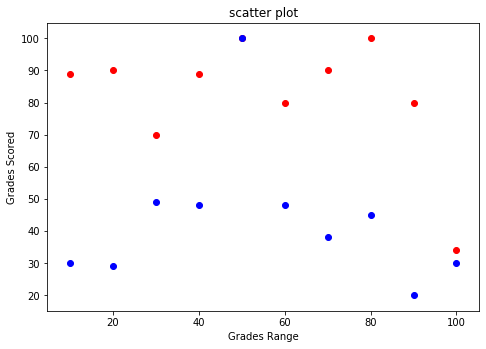

In [19]:
girls_grades = [89, 90, 70, 89, 100, 80, 90, 100, 80, 34]
boys_grades = [30, 29, 49, 48, 100, 48, 38, 45, 20, 30]
grades_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(grades_range, girls_grades, color='r')
ax.scatter(grades_range, boys_grades, color='b')
ax.set_xlabel('Grades Range')
ax.set_ylabel('Grades Scored')
ax.set_title('scatter plot')
plt.show()

# Box Plot

In [20]:
df['duration'] = df['duration'].str.extract('(\d+)').astype(int)
df2 = df[['duration','type']]

In [21]:
df2 = df2.loc[df['type'] == 'Movie']

### How to Interpret Boxplot
<img align="left" width="300" height="300" src="https://miro.medium.com/max/301/1*fCE_5juz235c6cmaOP_PDQ.png">

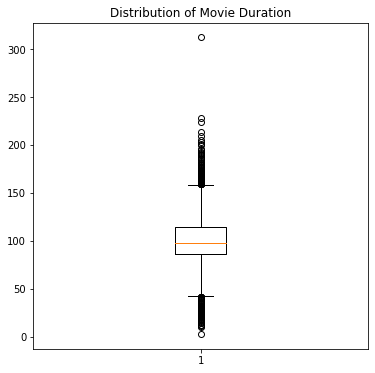

In [22]:
plt.figure(figsize=(6,6))
plt.boxplot(df2['duration'])

plt.title("Distribution of Movie Duration")
plt.show()

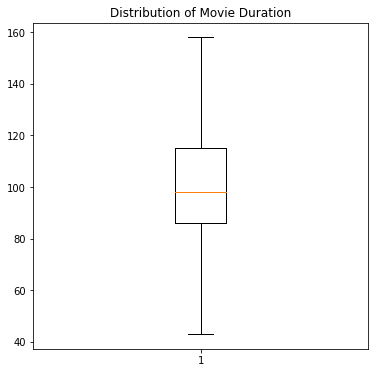

In [23]:
# without outliers
plt.figure(figsize=(6,6))
plt.boxplot(df2['duration'], showfliers = False)

plt.title("Distribution of Movie Duration")
plt.show()

#### Reference:
- [Why Visualization?](https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70)
- [Matplotlib Detailed Tutorial](https://matplotlib.org/3.1.1/contents.html)
- [Plot Tutotial](https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm)
- [Line Charts](https://jakevdp.github.io/PythonDataScienceHandbook/04.01-simple-line-plots.html)
- [Pivoting/stacking](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html)